In [1]:
import pandas as pd
import numpy as np

In [74]:
df=pd.read_csv('data.csv')

Splitting Data to Train and Test part

In [75]:
from sklearn.model_selection import train_test_split
features=df.drop('OS',axis=1)
target=df.OS
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.15,random_state=42)

Prepration of Train Data

In [4]:
features_train.shape

(2253, 36)

In [5]:
features_train.head()

,Unnamed: 0,name,brand,2G,3G,4G,5G,Announced,Status,Weight,...,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
1313,2438,lg optimus vu p895,lg,True,True,False,False,2012.0,Discontinued,168.0,...,"4.0, A2DP",ULP GeForce,True,True,Nvidia Tegra 3,GSM / HSPA HSPA 21.1/5.76 Mbps,32GB 1GB RAM,No,1.0,32.0
2302,4078,samsung galaxy j2 core,samsung,True,True,True,False,2018.0,Available,154.0,...,"4.2, A2DP",Mali-T720,True,True,Exynos 7570 Quad (14 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDXC (dedicated slot),1.0,8.0
2080,3784,xiaomi mi max 2,xiaomi,True,True,True,False,2017.0,Available,211.0,...,"4.2, A2DP, LE",Adreno 506,False,True,Qualcomm MSM8953 Snapdragon 625 (14 nm),GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...,"32GB 4GB RAM, 64GB 4GB RAM, 128GB 4GB RAM",microSDXC (uses shared SIM slot),4.0,32.0
1817,3389,zte blade iii,zte,True,True,False,False,2012.0,Discontinued,130.0,...,"2.1, A2DP",Adreno 200,True,True,Qualcomm MSM7227A Snapdragon S1,GSM / HSPA HSPA 7.2/5.76 Mbps,"4GB (2.5GB user available), 512MB RAM",microSDHC (dedicated slot),0.5,4.0
2112,3823,xiaomi redmi note 4g,xiaomi,True,True,True,False,2014.0,Discontinued,185.0,...,"4.0, A2DP, LE",Adreno 305,True,True,Qualcomm MSM8928 Snapdragon 400 (28 nm),"GSM / HSPA / LTE HSPA, LTE Cat4 150/50 Mbps",8GB 2GB RAM,microSDXC (dedicated slot),2.0,8.0


In [6]:
target_train

1313    Android 4.0.4
2302      Android 8.1
2080    Android 7.1.1
1817      Android 4.0
2112      Android 4.2
            ...      
1638       Android 13
1095      Android 4.3
1130       Android 10
1294    Android 4.1.2
860       Android 4.2
Name: OS, Length: 2253, dtype: object

In [76]:
def getOS(x):
    return x.split(' ')[0]
target_train=target_train.apply(getOS)

In [77]:
target_train.value_counts()

OS
Android      2076
Phone          55
iOS            52
HarmonyOS      19
Symbian         8
Belle           7
KaiOS           6
iPadOS          5
platform        5
EMUI            4
Tizen           3
OS              3
Anna            3
FP1             2
Firefox         1
Linux           1
MeeGo           1
Windows         1
Mobile          1
Name: count, dtype: int64

In [78]:
def OS_reDefine(x):
     if (x=='Android')  or (x=='iOS'):
          return x
     else: return 'other'
target_train=target_train.apply(OS_reDefine)

In [79]:
target_train.value_counts()

OS
Android    2076
other       125
iOS          52
Name: count, dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target_train=pd.DataFrame(le.fit_transform(target_train),columns=['OS'])

In [81]:
target_train.OS.value_counts()

OS
0    2076
2     125
1      52
Name: count, dtype: int64

In [82]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 1313 to 860
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2253 non-null   int64  
 1   name              2253 non-null   object 
 2   brand             2253 non-null   object 
 3   2G                2253 non-null   bool   
 4   3G                2253 non-null   bool   
 5   4G                2253 non-null   bool   
 6   5G                2253 non-null   bool   
 7   Announced         2253 non-null   float64
 8   Status            2253 non-null   object 
 9   Weight            2253 non-null   float64
 10  Length            2253 non-null   object 
 11  Width             2253 non-null   object 
 12  Diameter          2253 non-null   object 
 13  SIM               2253 non-null   object 
 14  Display Type      2253 non-null   object 
 15  Display Size      2253 non-null   float64
 16  ppi               2253 non-null   float64
 17

Unamed: 0 is an index column, which does not have helpful information for us.
'name' column is a data which is unique in each row, so we can easily iqnore it.

In [14]:
features_train.Status.value_counts()

Status
Discontinued    1162
Available       1088
Coming             3
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features_train.Status=le.fit_transform(features_train.Status)


In [18]:
features_train.Status.value_counts()

Status
2    1162
0    1088
1       3
Name: count, dtype: int64

In [19]:
target_train.OS.corr(features_train.Status)

-0.010707452695244877

Status has very small correlation with OS and so we think it is good to ignore it.

In [20]:
features_train.WLAN

1313      Wi-Fi 802.11 b/g/n, Wi-Fi Direct, DLNA, hotspot
2302                     Wi-Fi 802.11 b/g/n, Wi-Fi Direct
2080    Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Dire...
1817      Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot, DLNA
2112    Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Dire...
                              ...                        
1638                 Wi-Fi 802.11 a/b/g/n/ac/6, dual-band
1095                                   Wi-Fi 802.11 b/g/n
1130                     Wi-Fi 802.11 b/g/n, Wi-Fi Direct
1294            Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot
860                                    Wi-Fi 802.11 b/g/n
Name: WLAN, Length: 2253, dtype: object

WLAN is also very variant, and we think we cannot extract helpful feature from them.

In [110]:
features_train.Colors

1313                        Black, White
2302               Black, Gold, Lavender
2080                   Gold, Matte Black
1817                        Black, White
2112                         Black/White
                      ...               
1638                               Black
1095                                Gray
1130              Magic Blue, Laser Blue
1294    Indigo Black, White, Pink, Titan
860                         Black, White
Name: Colors, Length: 2253, dtype: object

In [47]:
features_train.Sensors

1313              Accelerometer, gyro, proximity, compass
2302                             Accelerometer, proximity
2080    Fingerprint (rear-mounted), accelerometer, gyr...
1817                    Accelerometer, proximity, compass
2112              Accelerometer, gyro, proximity, compass
                              ...                        
1638    Accelerometer, gyro, compass, proximity (acces...
1095                               Accelerometer, compass
1130    Fingerprint (rear-mounted), accelerometer, pro...
1294                    Accelerometer, proximity, compass
860                     Accelerometer, proximity, compass
Name: Sensors, Length: 2253, dtype: object

We think that it may be helpful to find the most used sensors in devices, and add a column where it decides if that sensor is used or not.

In [48]:
features_train.Bluetooth

1313                                            4.0, A2DP
2302                                            4.2, A2DP
2080                                        4.2, A2DP, LE
1817                                            2.1, A2DP
2112                                        4.0, A2DP, LE
                              ...                        
1638    5.3, A2DP, LE, aptX HD, aptX Adaptive, aptX Lo...
1095                                            4.0, A2DP
1130                                        5.0, A2DP, LE
1294                                            3.0, A2DP
860                                             4.0, A2DP
Name: Bluetooth, Length: 2253, dtype: object

It maybe helpful to extract the version of the bluetooth, but we just ignor it for now.

In [51]:
features_train.GPU

1313       ULP GeForce
2302         Mali-T720
2080        Adreno 506
1817        Adreno 200
2112        Adreno 305
             ...      
1638        Adreno 730
1095        Adreno 305
1130    PowerVR GE8320
1294    PowerVR SGX531
860     PowerVR SGX544
Name: GPU, Length: 2253, dtype: object

In [75]:
features_train.Chipset

1313                                       Nvidia Tegra 3
2302                             Exynos 7570 Quad (14 nm)
2080              Qualcomm MSM8953 Snapdragon 625 (14 nm)
1817                      Qualcomm MSM7227A Snapdragon S1
2112              Qualcomm MSM8928 Snapdragon 400 (28 nm)
                              ...                        
1638           Qualcomm SM8475 Snapdragon 8+ Gen 1 (4 nm)
1095    Qualcomm MSM8228 Snapdragon 400 (28 nm) (3G)/ ...
1130                   Mediatek MT6765G Helio G35 (12 nm)
1294                              Mediatek MT6575 (40 nm)
860                               Mediatek MT6589 (28 nm)
Name: Chipset, Length: 2253, dtype: object

GPU and Chipset are also very variant, although we can extract the name from them, but for now we just want to ignore them.

In [21]:
features_train.Loudspeaker

1313     True
2302     True
2080    False
1817     True
2112     True
        ...  
1638    False
1095    False
1130     True
1294     True
860      True
Name: Loudspeaker, Length: 2253, dtype: bool

In [22]:
target_train.OS.corr(features_train.Loudspeaker)

-0.002895491490927737

In [23]:
features_train['3.5mm jack']

1313     True
2302     True
2080     True
1817     True
2112     True
        ...  
1638    False
1095     True
1130     True
1294     True
860      True
Name: 3.5mm jack, Length: 2253, dtype: bool

In [24]:
target_train.OS.corr(features_train['3.5mm jack'])

0.012252772843352711

In [113]:
features_train.Network

1313                       GSM / HSPA HSPA 21.1/5.76 Mbps
2302    GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...
2080    GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...
1817                        GSM / HSPA HSPA 7.2/5.76 Mbps
2112          GSM / HSPA / LTE HSPA, LTE Cat4 150/50 Mbps
                              ...                        
1638                  GSM / HSPA / LTE / 5G HSPA, LTE, 5G
1095                                      GSM / HSPA HSPA
1130                           GSM / HSPA / LTE HSPA, LTE
1294                        GSM / HSPA HSPA 7.2/5.76 Mbps
860                        GSM / HSPA HSPA 42.2/5.76 Mbps
Name: Network, Length: 2253, dtype: object

It may be helpful to add a column to check if a specific network is supported for that device on not. For now we just ignore it.

The data of internal was extracted to RAM and memory columns, so we can easily drop it.

In [25]:
features_train['Card slot']

1313                                  No
2302          microSDXC (dedicated slot)
2080    microSDXC (uses shared SIM slot)
1817          microSDHC (dedicated slot)
2112          microSDXC (dedicated slot)
                      ...               
1638                                  No
1095          microSDXC (dedicated slot)
1130          microSDXC (dedicated slot)
1294          microSDHC (dedicated slot)
860           microSDHC (dedicated slot)
Name: Card slot, Length: 2253, dtype: object

In our first try we don't extract feature from card slot.

In [122]:
features_train['Display Type'].unique()

array(['HD-IPS LCD', 'PLS LCD', 'IPS LCD', 'TFT, 65K colors',
       'OLED, 1B colors, 120Hz, 1000 nits (peak)',
       'IPS LCD, 400 nits (typ)', 'Super LCD3', 'OLED', 'TFT',
       'Dynamic LTPO AMOLED 2X, 120Hz, HDR10+, 2600 nits (peak)',
       'IPS LCD, 90Hz', 'Super AMOLED', 'Super LCD2',
       'Super AMOLED, 120Hz, HDR10+, 900 nits (HBM), 1300 nits (peak)',
       'Super LCD', 'Dynamic AMOLED 2X, 120Hz, HDR10+, 1400 nits (peak)',
       'IPS LCD, HDR10', 'Dual IPS LCD', 'TFT,', 'S-LCD',
       'AMOLED, 1B colors, 120Hz, 1300 nits (peak)', 'LCD',
       'Super AMOLED, 120Hz, HDR10+, 1100 nits (peak)', 'TFT LCD',
       'OLED, 1B colors, 120Hz, 600 nits (typ)',
       'OLED, 120Hz, Dolby Vision, HDR10+, 1200 nits (peak)',
       'OLED, HDR10',
       'Super Retina OLED, HDR10, Dolby Vision, 625 nits (HBM)',
       'TFT, 256K colors', 'LED-backlit LCD,', 'IPS LCD, 450 nits (typ)',
       'AMOLED', 'AMOLED, 165Hz, 700 nits (typ)', 'OLED, HDR10, 90Hz',
       'Liquid Retina IPS LCD,

In [123]:
def getDisplay(x):
    return x.split(',')[0]
features_train['Display Type']=features_train['Display Type'].apply(getDisplay)

In [124]:
features_train['Display Type'].unique()

array(['HD-IPS LCD', 'PLS LCD', 'IPS LCD', 'TFT', 'OLED', 'Super LCD3',
       'Dynamic LTPO AMOLED 2X', 'Super AMOLED', 'Super LCD2',
       'Super LCD', 'Dynamic AMOLED 2X', 'Dual IPS LCD', 'S-LCD',
       'AMOLED', 'LCD', 'TFT LCD', 'Super Retina OLED', 'LED-backlit LCD',
       'Liquid Retina IPS LCD', 'IPS-NEO LCD', 'Super IPS+',
       'Super IPS LCD2', 'Super IPS LCD', 'P-OLED', 'Super LCD5',
       'True HD-IPS LCD', 'Super Retina XDR OLED', '3D IPS LCD',
       'IPS+ LCD', 'LTPO OLED', 'TFT resistive touchscreen',
       'LTPO AMOLED', 'Super AMOLED Plus', 'True HD-IPS + LCD',
       'Retina IPS LCD', 'Super IPS+ LCD', 'LED-backlit IPS LCD',
       'AMOLED or SLCD', 'IGZO IPS LCD', '3D LCD', 'TN TFT LCD',
       'Liquid Retina XDR mini-LED LCD', 'True Full HD IPS Plus LCD',
       'PLS', 'SC-LCD', 'Super clear LCD', 'Super Clear LCD',
       'Super AMOLED ', 'S-IPS LCD', 'Samsung AMOLED', 'AMOLED or LCD',
       '3D S-LCD', 'True HD IPS+', 'Foldable AMOLED', 'S-LCD2',
       '

We try to extract some data from Display type, but these are ver variant and we decided to put them away.

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features_train.brand=le.fit_transform(features_train.brand)

In [32]:
features_train.brand.value_counts()

brand
10    443
12    244
5     240
8     197
13    177
4     177
7     142
9     130
3     124
11    100
0      98
2      91
1      57
6      33
Name: count, dtype: int64

In [33]:
target_train.OS.corr(features_train.brand)

0.03363059036366866

In [84]:
features_train.drop(['Unnamed: 0','brand','name','Status','WLAN','Colors','Sensors','Bluetooth','GPU','Loudspeaker','Display Type',
                 '3.5mm jack','Chipset','Network','Internal','Card slot'],axis=1,inplace=True)

In [85]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2253 entries, 1313 to 860
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   2G                2253 non-null   bool   
 1   3G                2253 non-null   bool   
 2   4G                2253 non-null   bool   
 3   5G                2253 non-null   bool   
 4   Announced         2253 non-null   float64
 5   Weight            2253 non-null   float64
 6   Length            2253 non-null   object 
 7   Width             2253 non-null   object 
 8   Diameter          2253 non-null   object 
 9   SIM               2253 non-null   object 
 10  Display Size      2253 non-null   float64
 11  ppi               2253 non-null   float64
 12  body ratio        2253 non-null   float64
 13  battery_capacity  2253 non-null   float64
 14  Price             2253 non-null   float64
 15  CPU               2009 non-null   float64
 16  ratio             2253 non-null   object 
 17

In [86]:
features_train['2G']=features_train['2G'].map({True:1,False:0})
features_train['3G']=features_train['3G'].map({True:1,False:0})
features_train['4G']=features_train['4G'].map({True:1,False:0})
features_train['5G']=features_train['5G'].map({True:1,False:0})

In [87]:
features_train['2G'].value_counts()

2G
1    2253
Name: count, dtype: int64

In [88]:
features_train['3G'].value_counts()

3G
1    2231
0      22
Name: count, dtype: int64

Because most of the devices support 2G and 3G we can drop them from our model.

In [89]:
features_train['4G'].value_counts()

4G
1    1667
0     586
Name: count, dtype: int64

In [90]:
features_train['5G'].value_counts()

5G
0    1964
1     289
Name: count, dtype: int64

In [93]:
def getLength(x):
        a=x.split(' ')
        if a[0]=='Unfolded:': 
                return float(a[1])
        else:
                return float(a[0])
features_train.Length=features_train.Length.apply(getLength)

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Length', ylabel='Count'>

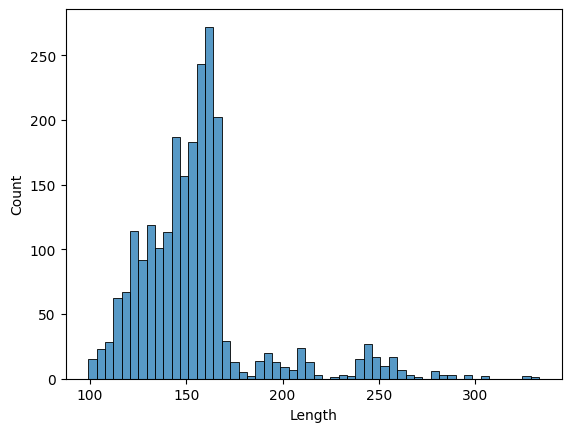

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.Length)

In [95]:
def getWidth(x):
        return float(x.split('mm')[0])
features_train.Width=features_train.Width.apply(getWidth)

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Width', ylabel='Count'>

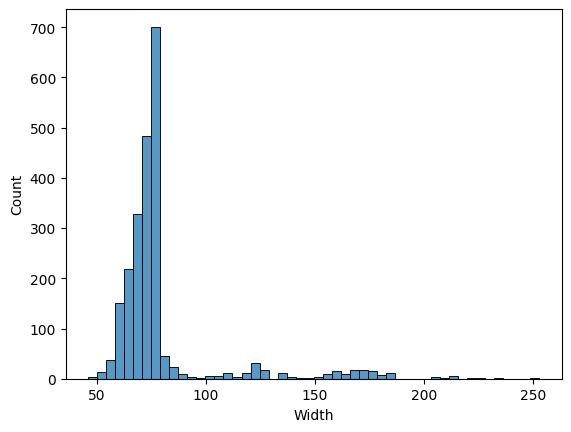

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.Width,bins=50)

In [97]:
def getDiameter(x):
        return float(x.split('-')[0])
features_train.Diameter=features_train.Diameter.apply(getDiameter)


/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Diameter', ylabel='Count'>

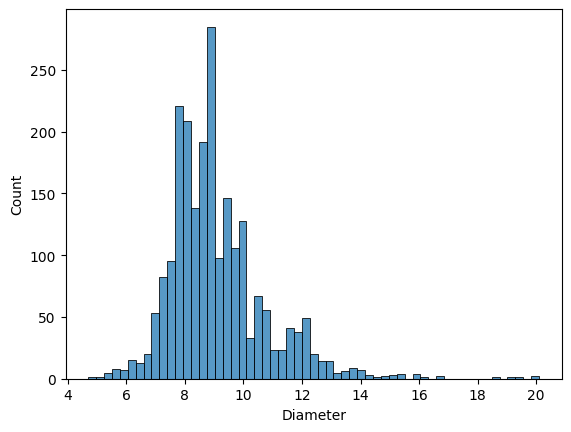

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.Diameter)

In [99]:
features_train.SIM.value_counts()

SIM
Nano-SIM     1221
Micro-SIM     542
Mini-SIM      406
eSIM           84
Name: count, dtype: int64

In [100]:
features_train.SIM=features_train.SIM.map({'eSIM':0,'Mini-SIM':1,'Micro-SIM':2,'Nano-SIM':3})

In [68]:
features_train.SIM.value_counts()

SIM
3    1221
2     542
1     406
0      84
Name: count, dtype: int64

In [101]:
def getRatio(x):
    return int(x.split(':')[0])/int(x.split(':')[1])
features_train.ratio=features_train.ratio.apply(getRatio)
    

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ratio', ylabel='Count'>

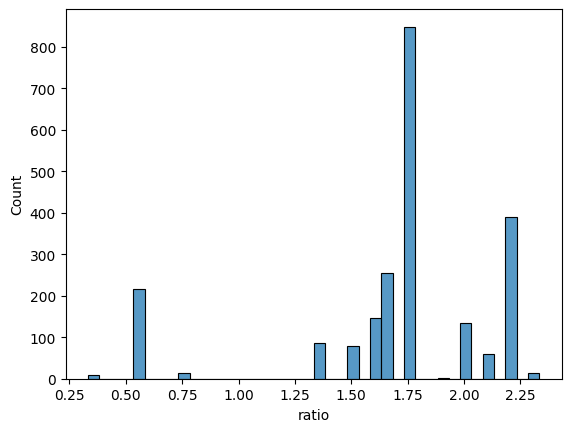

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.ratio)

In [71]:
features_train.CPU.describe()

count    2009.000000
mean        5.858138
std         2.372293
min         2.000000
25%         4.000000
50%         8.000000
75%         8.000000
max        10.000000
Name: CPU, dtype: float64

In [103]:
features_train.CPU=features_train.CPU.fillna(features_train.CPU.median())

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='battery_capacity', ylabel='Count'>

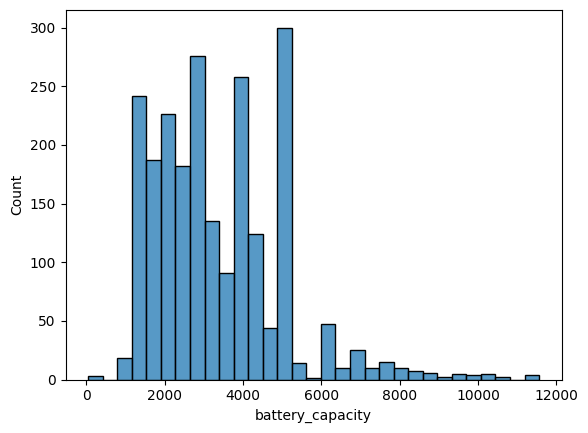

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train['battery_capacity'])

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Display Size', ylabel='Count'>

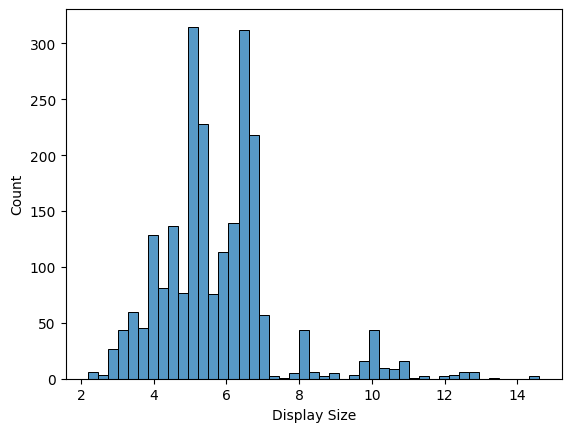

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train['Display Size'])

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ppi', ylabel='Count'>

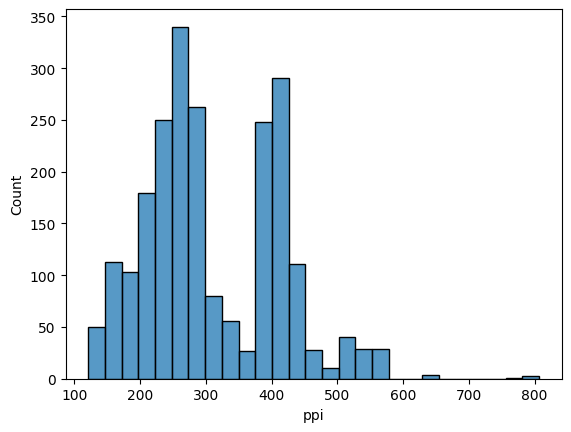

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.ppi)

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='body ratio', ylabel='Count'>

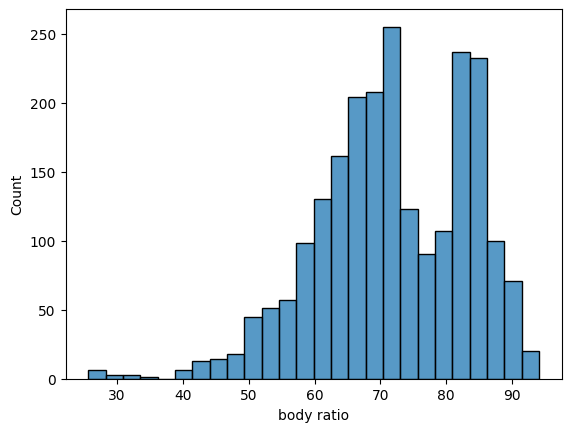

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train['body ratio'])

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

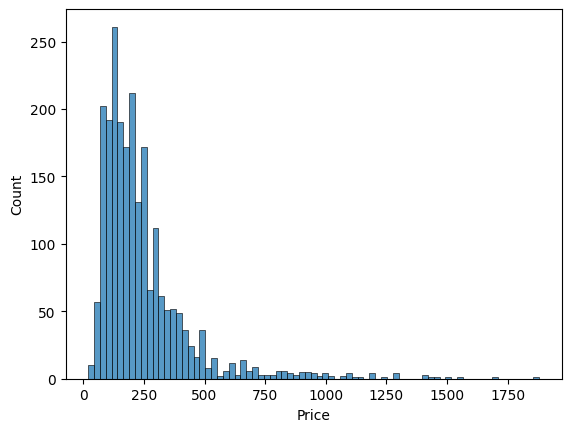

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.Price)

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RAM', ylabel='Count'>

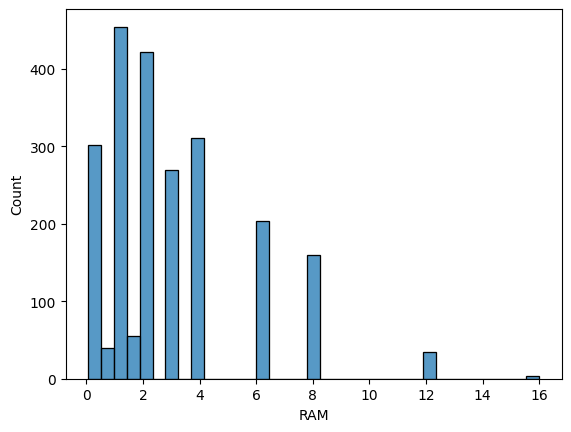

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.RAM)

/Users/mohammadhossein/miniconda3/envs/quera/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Storage', ylabel='Count'>

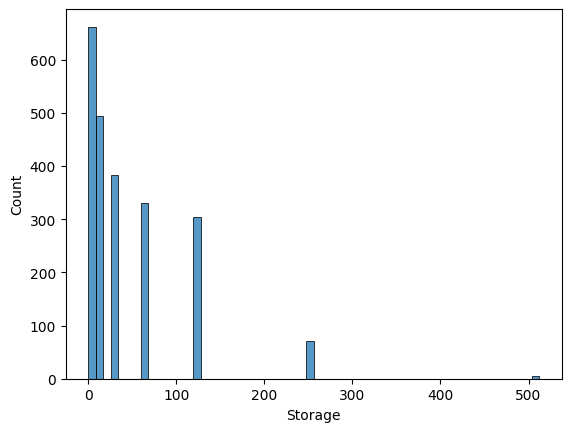

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(features_train.Storage)

In [115]:
features_train.drop(['2G','3G'],axis=1,inplace=True)

In [116]:
features_train

,4G,5G,Announced,Weight,Length,Width,Diameter,SIM,Display Size,ppi,body ratio,battery_capacity,Price,CPU,ratio,pixel,RAM,Storage
1313,0,0,2012.0,168.0,139.6,90.4,8.5,2,5.00,256.0,61.3,2100.0,210.0,4.0,1.333333,786432.0,1.0,32.0
2302,1,0,2018.0,154.0,143.4,72.1,8.9,2,5.00,220.0,66.7,2600.0,120.0,4.0,1.777778,518400.0,1.0,8.0
2080,1,0,2017.0,211.0,174.1,88.7,7.6,3,6.44,342.0,74.0,5300.0,200.0,8.0,1.777778,2073600.0,4.0,32.0
1817,0,0,2012.0,130.0,123.0,63.5,10.0,1,4.00,233.0,58.3,1600.0,190.0,8.0,1.666667,384000.0,0.5,4.0
2112,1,0,2014.0,185.0,154.0,78.7,9.5,1,5.50,267.0,68.8,3100.0,160.0,4.0,1.777778,921600.0,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1,1,2023.0,613.0,279.7,181.9,6.5,3,12.10,249.0,83.4,10000.0,500.0,8.0,1.600000,4096000.0,12.0,256.0
1095,0,0,2014.0,615.0,261.0,180.0,8.1,2,10.10,224.0,63.0,9000.0,260.0,4.0,1.600000,2304000.0,2.0,16.0
1130,1,0,2021.0,201.0,166.5,77.3,9.3,3,6.55,280.0,91.9,5000.0,170.0,8.0,1.777778,1440000.0,4.0,128.0
1294,0,0,2013.0,100.0,118.4,62.2,9.2,1,4.00,233.0,61.8,1700.0,120.0,8.0,1.666667,384000.0,0.5,4.0


Decision Tree Classifier

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


cls=DecisionTreeClassifier(random_state=42)



cls.fit(X_train_resampled,y_train_resampled)

result=cross_validate(cls,X_train_resampled,y_train_resampled,cv=5,return_train_score=True,scoring='f1_weighted')
pprint(result)

y_pred=cls.predict(X_train_scaled)
print('Train Accuracy:',f1_score(y_train,y_pred, average='weighted'))
print('Train F1:',f1_score(y_train,y_pred,average='weighted'))

y_pred=cls.predict(X_val_scaled)
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))




Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
{'fit_time': array([0.05956697, 0.04239488, 0.03422904, 0.03098989, 0.03006506]),
 'score_time': array([0.00508904, 0.00133801, 0.00194001, 0.00140119, 0.00132585]),
 'test_score': array([0.95654846, 0.97538597, 0.97138748, 0.96960966, 0.96965329]),
 'train_score': array([1., 1., 1., 1., 1.])}
Train Accuracy: 1.0
Train F1: 1.0
Test Accuracy: 0.9497041420118343
Test F1: 0.9510902640035952
Test recission: 0.9528868771926036
Test Recall: 0.9497041420118343


Text(50.722222222222214, 0.5, 'True Lables')

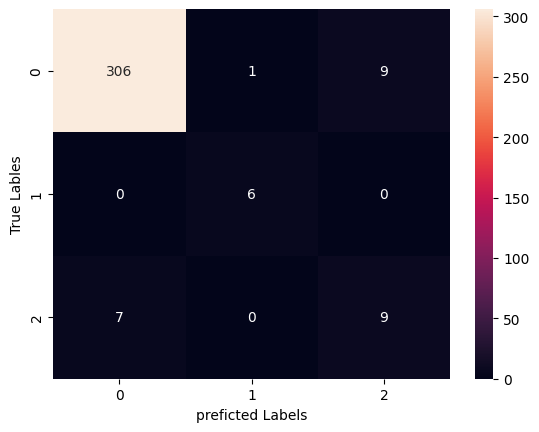

In [132]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))

params={
         'criterion':['gini','entropy','log_loss'],
        'max_depth':[3,5,7,10,12,15],
        'min_samples_leaf':[1,2,3,4],
        'ccp_alpha':[0,0.01,0.1,0.5,1]
}


cls=DecisionTreeClassifier(random_state=42)


grid_search=GridSearchCV(cls,params,cv=5,scoring='f1_weighted')
grid_search.fit(X_train_resampled,y_train_resampled)

print('Best Hyperparameters:',grid_search.best_params_)

y_pred=grid_search.best_estimator_.predict(X_train_scaled)
print('Train F1:',f1_score(y_train,y_pred, average='weighted'))
print('Train Accuracy:',accuracy_score(y_train,y_pred))

y_pred=grid_search.best_estimator_.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Best Hyperparameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2}
Train F1: 0.9920226852248695
Train Accuracy: 0.9921671018276762
Test F1: 0.9585798816568047
Test recission: 0.9585798816568047
Test Accuracy: 0.9585798816568047
Test Recall: 0.9585798816568047


Text(50.722222222222214, 0.5, 'True Lables')

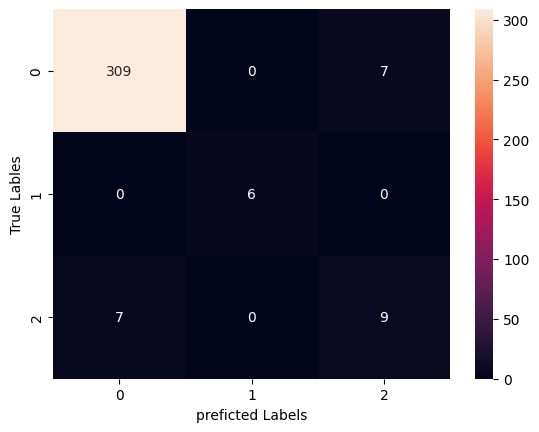

In [126]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


cls=DecisionTreeClassifier(random_state=42,criterion='entropy',min_samples_leaf=2,max_depth=15,ccp_alpha=0)



cls.fit(X_train_resampled,y_train_resampled)

result=cross_validate(cls,X_train_resampled,y_train_resampled,cv=5,return_train_score=True,scoring='f1_weighted')
pprint(result)

y_pred=cls.predict(X_train_scaled)
print('Train Accuracy:',f1_score(y_train,y_pred, average='weighted'))
print('Train F1:',f1_score(y_train,y_pred,average='weighted'))

y_pred=cls.predict(X_val_scaled)
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


print('Feature Importances:',cls.feature_importances_)

Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
{'fit_time': array([0.06995511, 0.06145477, 0.0370121 , 0.03694797, 0.03538418]),
 'score_time': array([0.00235796, 0.00243211, 0.00141001, 0.00132513, 0.00131106]),
 'test_score': array([0.95358138, 0.98013703, 0.97529617, 0.97912396, 0.9848305 ]),
 'train_score': array([0.99668663, 0.99431955, 0.99550178, 0.99502825, 0.99432111])}
Train Accuracy: 0.9920226852248695
Train F1: 0.9920226852248695
Test Accuracy: 0.9585798816568047
Test F1: 0.9585798816568047
Test recission: 0.9585798816568047
Test Recall: 0.9585798816568047
Feature Importances: [0.01663914 0.02106385 0.05073159 0.00946526 0.01623626 0.1103449
 0.22280921 0.0553814  0.0067454  0.01926502 0.00548266 0.03270127
 0.01531269 0.20451176 0.01048741 0.09415685 0.07939368 0.02927165]


Text(50.722222222222214, 0.5, 'True Lables')

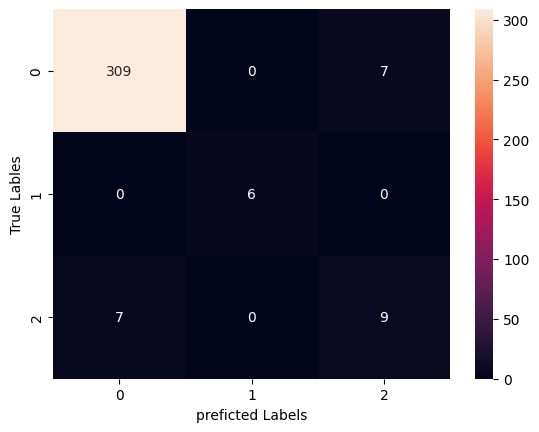

In [134]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

<Axes: >

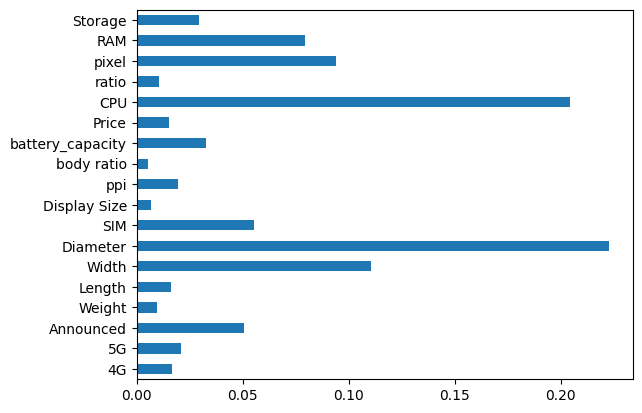

In [141]:
import matplotlib.pyplot as plt
pd.Series(cls.feature_importances_,index=X.columns).plot(kind='barh')

Gradiant Boosting Classifier

In [144]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


xgbc=XGBClassifier(objective='multi:softmax',max_depth=5,seed=42)



xgbc.fit(X_train_resampled,y_train_resampled)


y_pred=xgbc.predict(X_train_scaled)
print('Train F1',f1_score(y_train,y_pred, average='weighted'))
print('Train accuracy',accuracy_score(y_train,y_pred))

y_pred=xgbc.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Train F1 1.0
Train accuracy 1.0
Test F1: 0.9720584100625455
Test recission: 0.9714914752662153
Test Accuracy: 0.9733727810650887
Test Recall: 0.9733727810650887


Text(50.722222222222214, 0.5, 'True Lables')

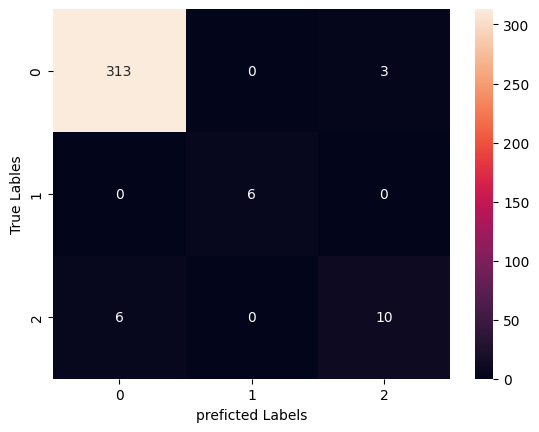

In [145]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [147]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))

params={     
            'n_estimators':[50,100,200,300,500,700,1000],
           'min_child_weight':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
           'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           'max_depth':[3,4,5,6,7,8,9,10,11,12,13,14,15],
           'learning_rate':[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],
           'reg_alpha':[0,0.1,0.3,0.5,0.7,0.9,1,1.3,1.5],
           'reg_lambda':[0,0.3,0.5,0.7,1,1.5,2,2.5,3]

}


xgbc=XGBClassifier(objective='multi:softmax',eval_metric='auc',seed=42)


random_search=RandomizedSearchCV(xgbc,params,cv=5,scoring='f1_weighted')
random_search.fit(X_train_resampled,y_train_resampled)

print('Best Hyperparameters:',random_search.best_params_)

y_pred=random_search.best_estimator_.predict(X_train_scaled)
print('Train F1:',f1_score(y_train,y_pred, average='weighted'))
print('Train Accuracy:',accuracy_score(y_train,y_pred))

y_pred=random_search.best_estimator_.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Best Hyperparameters: {'reg_lambda': 2, 'reg_alpha': 0.3, 'n_estimators': 200, 'min_child_weight': 12, 'max_depth': 11, 'learning_rate': 0.1, 'gamma': 0.3}
Train F1: 0.9900206188225164
Train Accuracy: 0.9900783289817232
Test F1: 0.9727186505222907
Test recission: 0.9725741378252903
Test Accuracy: 0.9733727810650887
Test Recall: 0.9733727810650887


Text(50.722222222222214, 0.5, 'True Lables')

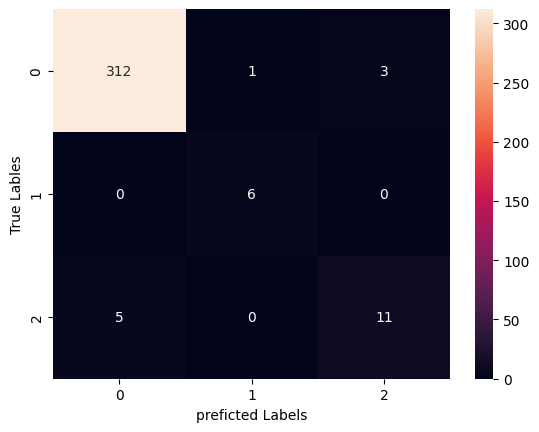

In [148]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 



sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [150]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score,roc_auc_score
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


xgbc=XGBClassifier(objective='multi:softmax',n_estimators=200,learning_rate=0.1,gamma=0.3,min_child_weight=12,max_depth=11,reg_alpha=0.3,reg_lambda=2,seed=42)


xgbc.fit(X_train_resampled,y_train_resampled)


y_pred=xgbc.predict(X_train_scaled)
print('Train F1',f1_score(y_train,y_pred, average='weighted'))
print('Train accuracy',accuracy_score(y_train,y_pred))

y_pred=xgbc.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))

print('Feature Importances:',xgbc.feature_importances_)

Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Train F1 0.9900206188225164
Train accuracy 0.9900783289817232
Test F1: 0.9727186505222907
Test recission: 0.9725741378252903
Test Accuracy: 0.9733727810650887
Test Recall: 0.9733727810650887
Feature Importances: [0.05216539 0.08896326 0.0305734  0.01501521 0.01835534 0.05687745
 0.0834913  0.09164114 0.02493983 0.02119154 0.01647182 0.0635637
 0.00940401 0.08473966 0.07251713 0.18175343 0.05119087 0.03714553]


<Axes: >

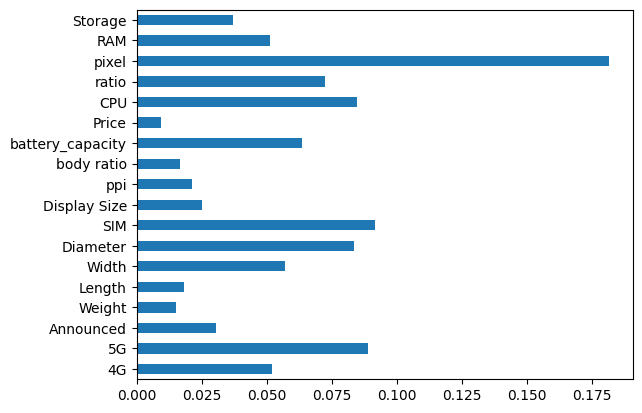

In [151]:
import matplotlib.pyplot as plt
pd.Series(xgbc.feature_importances_,index=X.columns).plot(kind='barh')

Support Vector Classification

In [158]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))

params={
             'kernel':['linear','poly','rbf'],
              'gamma': [1, 0.1, 0.01, 0.001],
            'C':[0.01,0.1,1,10,100,1000,5000,10000],
            'degree':[2,3,4,5]
}


svc=SVC(random_state=42)


random_search=RandomizedSearchCV(svc,params,cv=5,refit = True,scoring='f1_weighted')
random_search.fit(X_train_resampled,y_train_resampled)

print('Best Hyperparameters:',random_search.best_params_)

y_pred=random_search.best_estimator_.predict(X_train_scaled)
print('Train F1:',f1_score(y_train,y_pred, average='weighted'))
print('Train Accuracy:',accuracy_score(y_train,y_pred))

y_pred=random_search.best_estimator_.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))

Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'degree': 5, 'C': 10000}
Train F1: 1.0
Train Accuracy: 1.0
Test F1: 0.9481375341354832
Test recission: 0.949957734573119
Test Accuracy: 0.9467455621301775
Test Recall: 0.9467455621301775


Text(50.722222222222214, 0.5, 'True Lables')

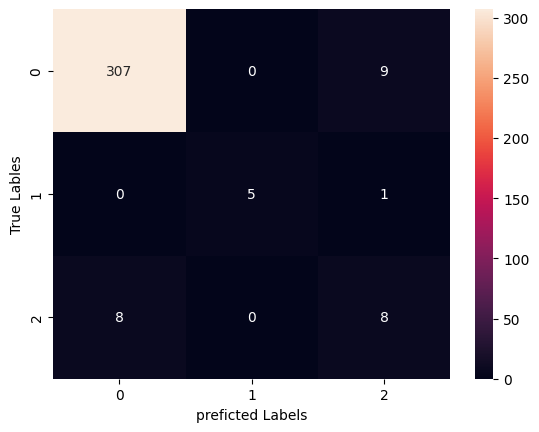

In [159]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

Random Forest Classifier

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))

params={
             'n_estimators':[10,50,100,200,300],
              'criterion':['gini','entropy','log_loss'],
              'max_depth':[3,5,7,10,15]
}


rfc=RandomForestClassifier(random_state=42)


random_search=RandomizedSearchCV(rfc,params,cv=5,scoring='f1_weighted')
random_search.fit(X_train_resampled,y_train_resampled)

print('Best Hyperparameters:',random_search.best_params_)

y_pred=random_search.best_estimator_.predict(X_train_scaled)
print('Train F1:',f1_score(y_train,y_pred, average='weighted'))
print('Train Accuracy:',accuracy_score(y_train,y_pred))

y_pred=random_search.best_estimator_.predict(X_val_scaled)
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))




Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 15, 'criterion': 'entropy'}
Train F1: 1.0
Train Accuracy: 1.0
Test F1: 0.9782676522708685
Test recission: 0.9780635605977374
Test Accuracy: 0.9792899408284024
Test Recall: 0.9792899408284024


Text(50.722222222222214, 0.5, 'True Lables')

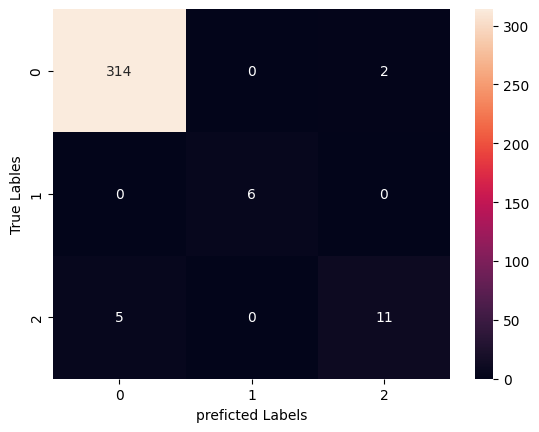

In [161]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from collections import Counter

X=features_train
y=target_train.OS


X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.15,random_state=42)

sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_val_scaled=sc.transform(X_val)

sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_train_resampled))


rfc=RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=100,random_state=42)



rfc.fit(X_train_resampled,y_train_resampled)


y_pred=rfc.predict(X_train_scaled)
print('Train Accuracy:',f1_score(y_train,y_pred, average='weighted'))
print('Train F1:',f1_score(y_train,y_pred,average='weighted'))

y_pred=rfc.predict(X_val_scaled)
print('Test Accuracy:',accuracy_score(y_val,y_pred))
print('Test F1:',f1_score(y_val,y_pred,average='weighted'))
print('Test recission:',precision_score(y_val,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_val,y_pred,average='weighted'))


print('Feature Importances:',rfc.feature_importances_)

Original dataset shape: Counter({0: 1760, 2: 109, 1: 46})
Resampled dataset shape: Counter({0: 1760, 2: 1760, 1: 1760})
Train Accuracy: 1.0
Train F1: 1.0
Test Accuracy: 0.9792899408284024
Test F1: 0.9782676522708685
Test recission: 0.9780635605977374
Test Recall: 0.9792899408284024
Feature Importances: [0.01618983 0.01396437 0.0562723  0.02516236 0.04080272 0.03908726
 0.10305691 0.10621813 0.04373365 0.04867459 0.03447488 0.05790152
 0.0266722  0.1289739  0.05536702 0.0740446  0.0550751  0.07432865]


Text(50.722222222222214, 0.5, 'True Lables')

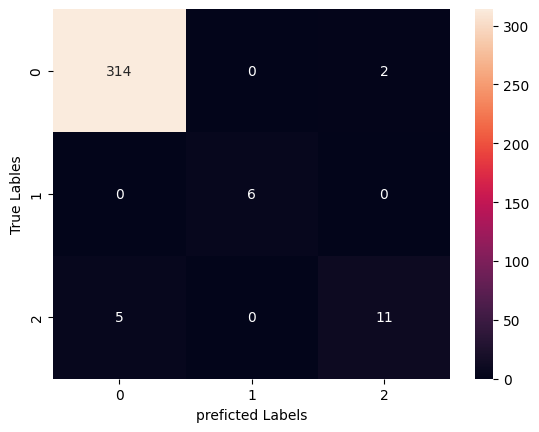

In [173]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_val,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

<Axes: >

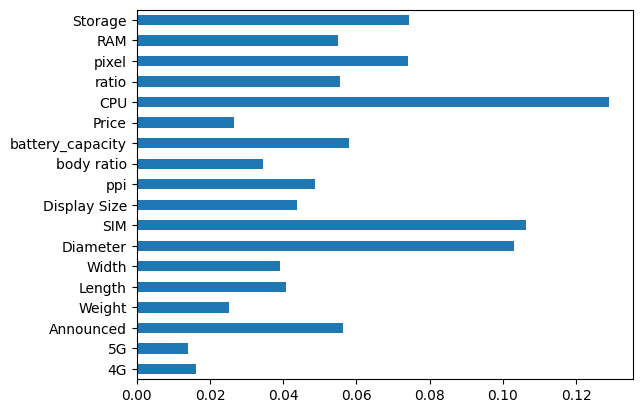

In [174]:
import matplotlib.pyplot as plt
pd.Series(rfc.feature_importances_,index=X.columns).plot(kind='barh')

##Chossing model

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

X_train=features_train
y_train=target_train.OS



sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)



sm=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=sm.fit_resample(X_train_scaled,y_train)

model=RandomForestClassifier(criterion='entropy',max_depth=15,n_estimators=100,random_state=42)

model.fit(X_train_resampled,y_train_resampled)


RandomForestClassifier(criterion='entropy', max_depth=15, random_state=42)

Test

In [ ]:

target_test=target_test.apply(getOS)

target_test=target_test.apply(OS_reDefine)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
target_test=pd.DataFrame(le.fit_transform(target_test),columns=['OS'])



features_test['4G']=features_test['4G'].map({True:1,False:0})
features_test['5G']=features_test['5G'].map({True:1,False:0})


features_test.Length=features_test.Length.apply(getLength)


features_test.Width=features_test.Width.apply(getWidth)

features_test.Diameter=features_test.Diameter.apply(getDiameter)

features_test.SIM=features_test.SIM.map({'eSIM':0,'Mini-SIM':1,'Micro-SIM':2,'Nano-SIM':3})

features_test.ratio=features_test.ratio.apply(getRatio)

features_test.CPU=features_test.CPU.fillna(features_test.CPU.median())


features_test.drop(['Unnamed: 0','brand','name','Status','WLAN','Colors','Sensors','Bluetooth','GPU','Loudspeaker',
                 '3.5mm jack','Chipset','Network','Internal','Card slot','Display Type','brand','2G','3G'],axis=1,inplace=True)


In [177]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 2469 to 1942
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   4G                398 non-null    int64  
 1   5G                398 non-null    int64  
 2   Announced         398 non-null    float64
 3   Weight            398 non-null    float64
 4   Length            398 non-null    float64
 5   Width             398 non-null    float64
 6   Diameter          398 non-null    float64
 7   SIM               398 non-null    int64  
 8   Display Size      398 non-null    float64
 9   ppi               398 non-null    float64
 10  body ratio        398 non-null    float64
 11  battery_capacity  398 non-null    float64
 12  Price             398 non-null    float64
 13  CPU               398 non-null    float64
 14  ratio             398 non-null    float64
 15  pixel             398 non-null    float64
 16  RAM               398 non-null    float64
 17

In [168]:
target_test.value_counts()

OS
0     373
2      17
1       8
Name: count, dtype: int64

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,precision_score,accuracy_score,recall_score
from pprint import pprint

X_test=features_test
y_test=target_test.OS

X_test_scaled=sc.transform(X_test)


y_pred=model.predict(X_test_scaled)
print('Test Accuracy:',accuracy_score(y_test,y_pred))
print('Test F1:',f1_score(y_test,y_pred,average='weighted'))
print('Test recission:',precision_score(y_test,y_pred,average='weighted'))
print('Test Recall:',recall_score(y_test,y_pred,average='weighted'))




Test Accuracy: 0.9773869346733668
Test F1: 0.9743455774371944
Test recission: 0.9779197032281828
Test Recall: 0.9773869346733668


Text(50.722222222222214, 0.5, 'True Lables')

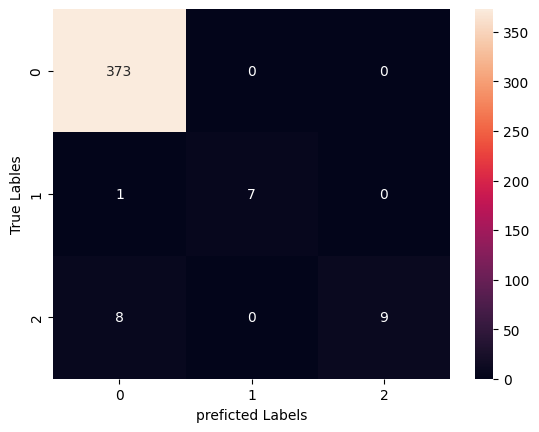

In [179]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred) 


sns.heatmap(cm , annot=True ,fmt='d')
plt.xlabel("preficted Labels")
plt.ylabel("True Lables")

In [196]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
lb.fit(y_test)
roc_auc_score(lb.transform(y_test),lb.transform(y_pred),average='weighted')

0.8200000000000001